In [38]:
import zipfile  # Import the zipfile module

# Open the ZIP file in read mode
zip_ref = zipfile.ZipFile("/content/train.zip", 'r')

# Extract all the contents into the specified directory
zip_ref.extractall("/content")

# Close the ZIP file
zip_ref.close()


In [39]:
import cv2
import numpy as np
import os
# Define the folder containing the extracted images
data_dir = "/content/train"  # Adjust if the folder name is different

def load_data(folder_path, img_size=(64, 64)):
    X = []
    y = []
    for label, category in enumerate(["cats", "dogs"]):  # 0 for 'cat', 1 for 'dog'
        category_path = os.path.join(folder_path, category)
        for file_name in os.listdir(category_path):
            img_path = os.path.join(category_path, file_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                X.append(img)
                y.append(label)
    X = np.array(X)
    y = np.array(y)
    return X, y

# Load and preprocess the data
X, y = load_data(data_dir)
print(f"Total images loaded: {len(y)}")


Total images loaded: 148


In [40]:
# Normalize pixel values to range [0, 1]
X = X / 255.0  # Normalization

# Flatten the images from 3D (height, width, channels) to 1D
X = X.reshape(X.shape[0], -1)

print("Data normalized and flattened.")
print(f"Input shape for SVM: {X.shape}")


Data normalized and flattened.
Input shape for SVM: (148, 12288)


In [41]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(y_train)}, Testing samples: {len(y_test)}")


Training samples: 118, Testing samples: 30


In [42]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

print("SVM model trained successfully!")


SVM model trained successfully!


In [43]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 66.67%


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Définir la fonction d'affichage des prédictions
def display_predictions(X, y_true, y_pred, img_shape=(64, 64, 3), num_images=5):
    plt.figure(figsize=(12, 6))
    indices = np.random.choice(range(len(X)), num_images, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        img = X[idx].reshape(img_shape)
        plt.imshow(img)
        true_label = "Cats" if y_true[idx] == 0 else "Dogs"
        pred_label = "Cats" if y_pred[idx] == 0 else "Dogs"
        plt.title(f"True: {true_label}\nPred: {pred_label}",
                  color=("green" if y_true[idx] == y_pred[idx] else "red"))
        plt.axis('off')
    plt.tight_layout()
    plt.show()


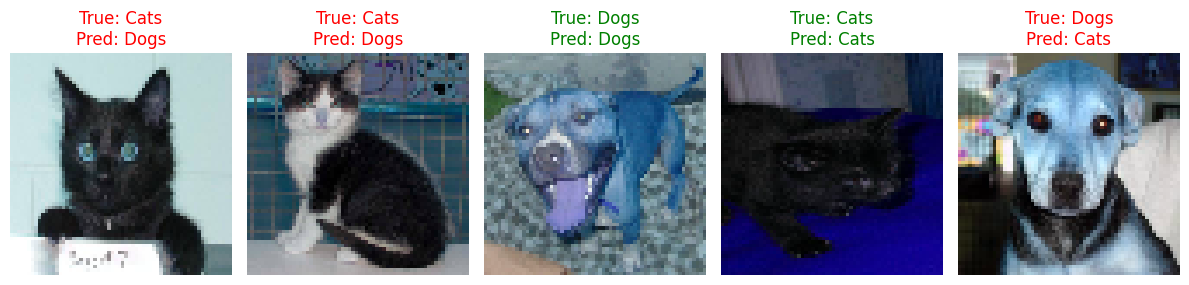


Rapport de classification :
              precision    recall  f1-score   support

        Cats       0.64      0.54      0.58        13
        Dogs       0.68      0.76      0.72        17

    accuracy                           0.67        30
   macro avg       0.66      0.65      0.65        30
weighted avg       0.66      0.67      0.66        30



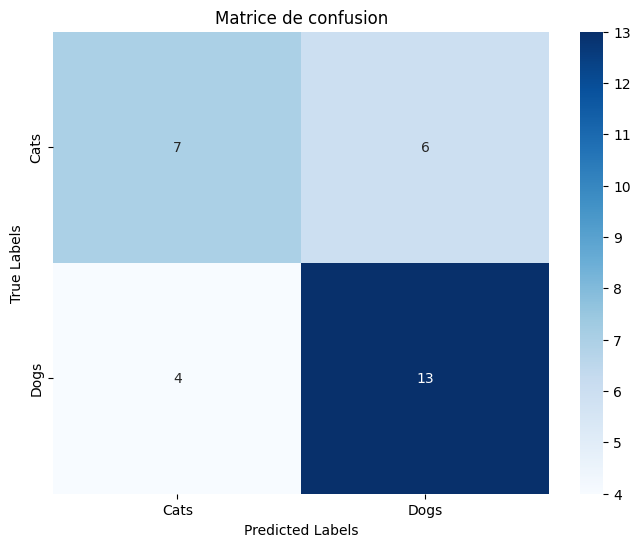

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# 1. Affichage des prédictions sur quelques images
display_predictions(X_test, y_test, y_pred, img_shape=(64, 64, 3))

# 2. Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=["Cats", "Dogs"]))

# 3. Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cats", "Dogs"], yticklabels=["Cats", "Dogs"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matrice de confusion")
plt.show()
